# Merge evaluations and obtain averaged results

In [26]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import scipy.stats as st
import matplotlib.pyplot as plt
import matplotlib.mlab as mlab
import seaborn as sns
%matplotlib inline

from warnings import filterwarnings
filterwarnings('ignore')

### 5 random state için sonuçların ortalamasını al ve yeni dosyaya bas

In [27]:
evaluation_dir = "./evaluation/"

# Excel dosyalarını oku ve birleştir
dfs = []
states = [1, 42, 123, 1234, 12345]
for idx in states:
    filename = 'evaluation_RS{}.xlsx'.format(idx)
    df = pd.read_excel(evaluation_dir + filename)
    dfs.append(df)


# Tüm dosyaları birleştirme
merged_df = pd.concat(dfs, axis=0)


# Ortalama değerlerin hesaplanması
averages = merged_df.groupby('Models').mean()
averages = averages.drop(['Unnamed: 0'], axis=1)

# Yeni verilerin yazılması
output_file = 'sonuclar_averaged.xlsx'
with pd.ExcelWriter(output_file) as writer:
    averages.to_excel(writer, sheet_name='Averages')

# Yeni dosyanın açılması ve sonuçların formatının değiştirilmesi
df = pd.read_excel(output_file, index_col=0)
df = df.applymap(lambda x: f"{x*100:.2f}")

# Yeni sonuçların yazılması
df.to_excel(output_file, sheet_name='Averages')

### F1 skoru ortalaması en yüksek olan model için tüm random state'leri tek bir dosyaya ayıkla

In [28]:
evaluation_dir = "./evaluation/"

# Excel dosyalarını oku ve birleştir
dfs = []
states = [1, 42, 123, 1234, 12345]
for idx in states:
    filename = 'evaluation_RS{}.xlsx'.format(idx)
    df = pd.read_excel(evaluation_dir + filename)
    dfs.append(df)


# Tüm dosyaları birleştirme
merged_df = pd.concat(dfs, axis=0)

# Ortalama değerlerin hesaplanması
averages = merged_df.groupby('Models').mean()
averages = averages.drop(['Unnamed: 0'], axis=1)

# max modelin bulunması
max_idx = averages.iloc[:,2].idxmax()
min_idx = averages.iloc[:,2].idxmin()

max_df = merged_df[merged_df['Models'] == max_idx]
max_df= max_df.drop(['Unnamed: 0'], axis=1)

min_df = merged_df[merged_df['Models'] == min_idx]
min_df= min_df.drop(['Unnamed: 0'], axis=1)

concatenated_df = pd.concat([min_df, max_df])

# Yeni verilerin yazılması
output_file = 'sonuclar_bestWorstModel.xlsx'
with pd.ExcelWriter(output_file) as writer:
    concatenated_df.iloc[:,:4].to_excel(writer, sheet_name='all_states')

# Yeni dosyanın açılması ve sonuçların formatının değiştirilmesi
df = pd.read_excel(output_file, index_col=0)
df = df.applymap(lambda x: "{:.2f}".format(x) if isinstance(x, float) else str(x))


# Yeni sonuçların yazılması
df.to_excel(output_file, sheet_name='all_states')

### Ortalama soru önem dağılımı

In [29]:
# AVERAGED FEATURE IMPORTANCES

averaged_data = pd.read_excel(f"./sonuclar_averaged.xlsx")

# Create a dictionary of old and new column names
col_names = {old_name: f'Q{i+1}' for i, old_name in enumerate(averaged_data.columns[4:])}

# Rename the columns using the dictionary
df = averaged_data.iloc[:,4:].rename(columns=col_names)

# 2. satırı 100'e bölüp 2 ondalık hale getirelim 
# (Catboost original hali 100'lük sistemdedir,
#  diğerlerini 100 ile çarparken o da 1000'e çıkmıştır, bu durumu düzeltiyoruz)
df.iloc[1] = df.iloc[1] / 100
df.iloc[1] = df.iloc[1].apply(lambda x: round(x, 2))

In [30]:
df

,Q1,Q2,Q3,Q4,Q5,Q6,Q7,Q8,Q9,Q10,Q11,Q12,Q13,Q14
0,10.00,10.80,5.20,10.00,3.60,10.80,6.00,9.60,6.00,4.00,10.40,1.60,4.40,7.60
1,9.23,10.94,8.41,10.52,3.38,5.34,5.15,8.29,10.26,6.50,6.42,1.45,3.15,10.96
2,4.01,5.92,25.68,6.51,3.23,2.47,4.03,2.02,28.35,1.60,2.59,0.44,2.06,11.09
3,2.74,13.18,22.02,9.57,1.31,2.82,2.85,3.93,21.64,1.69,2.84,0.03,0.15,15.24
4,8.57,10.84,9.76,7.43,3.47,5.02,4.20,9.93,8.80,10.41,5.81,1.35,2.64,11.76
5,4.28,9.00,18.24,4.42,3.64,2.90,3.98,6.05,17.60,16.49,3.66,0.08,1.55,8.11


In [31]:
ada_features = df[0:1].to_numpy().ravel()
cb_features = df[1:2].to_numpy().ravel()
dt_features = df[2:3].to_numpy().ravel()
gb_features = df[3:4].to_numpy().ravel()
rf_features = df[4:5].to_numpy().ravel()
xgb_features = df[5:6].to_numpy().ravel()

In [32]:
features = [ada_features, cb_features, dt_features, gb_features, rf_features, xgb_features]
feature_names = ['AdaBoost', 'CatBoost', 'Decision Tree', 'Gradient Boosting', 'Random Forest', 'XGBoost']

features_dict = dict(zip(feature_names, features))
features_dict

{'AdaBoost': array([10. , 10.8,  5.2, 10. ,  3.6, 10.8,  6. ,  9.6,  6. ,  4. , 10.4,
         1.6,  4.4,  7.6]),
 'CatBoost': array([ 9.23, 10.94,  8.41, 10.52,  3.38,  5.34,  5.15,  8.29, 10.26,
         6.5 ,  6.42,  1.45,  3.15, 10.96]),
 'Decision Tree': array([ 4.01,  5.92, 25.68,  6.51,  3.23,  2.47,  4.03,  2.02, 28.35,
         1.6 ,  2.59,  0.44,  2.06, 11.09]),
 'Gradient Boosting': array([ 2.74, 13.18, 22.02,  9.57,  1.31,  2.82,  2.85,  3.93, 21.64,
         1.69,  2.84,  0.03,  0.15, 15.24]),
 'Random Forest': array([ 8.57, 10.84,  9.76,  7.43,  3.47,  5.02,  4.2 ,  9.93,  8.8 ,
        10.41,  5.81,  1.35,  2.64, 11.76]),
 'XGBoost': array([ 4.28,  9.  , 18.24,  4.42,  3.64,  2.9 ,  3.98,  6.05, 17.6 ,
        16.49,  3.66,  0.08,  1.55,  8.11])}

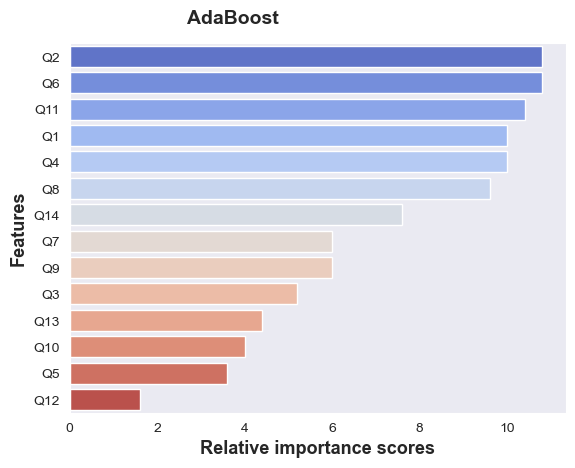

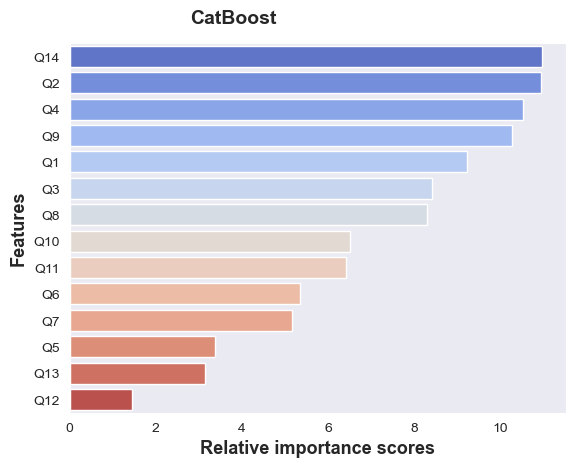

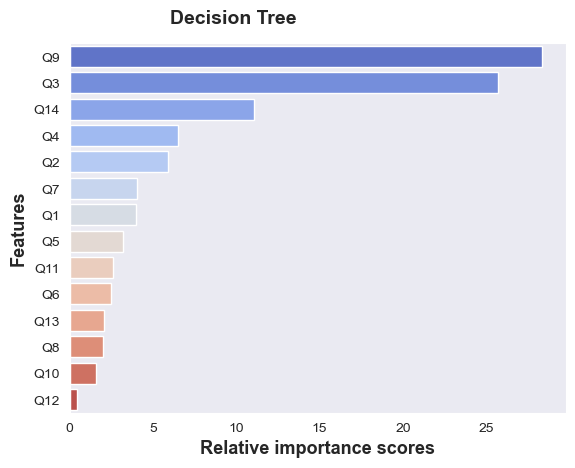

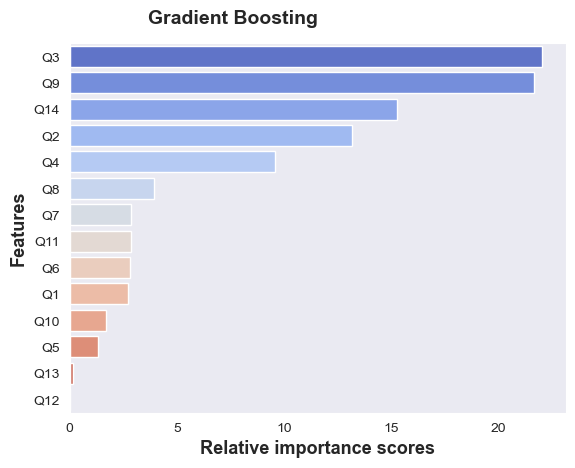

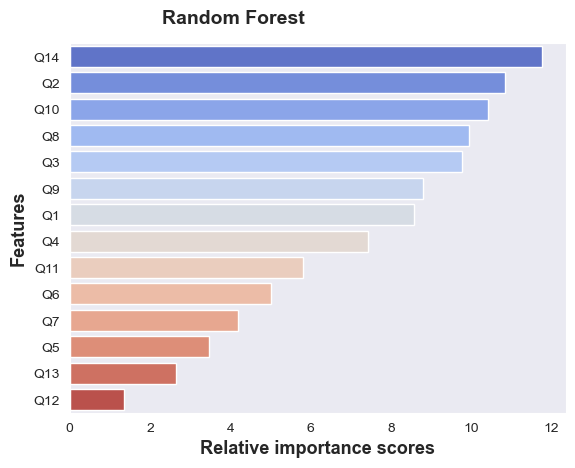

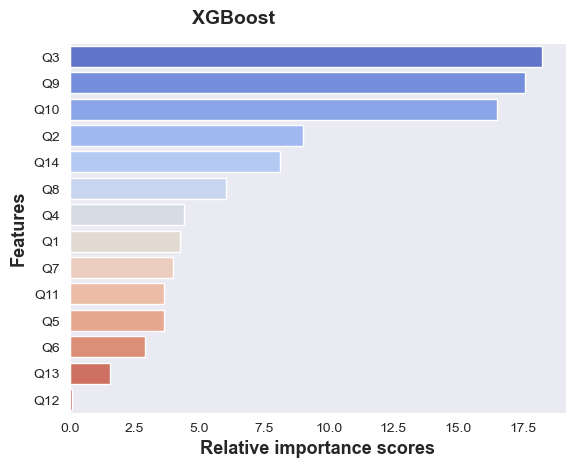

In [33]:
def print_feature_importances(fi, idx, path, name):
    
    feature_imp = pd.Series(fi, index = idx).sort_values(ascending = False)
    sns.set_style('dark', {'axes.grid' : False})
    with sns.plotting_context(rc={"axes.labelsize":16}):
        sns.barplot(x = feature_imp, y = feature_imp.index, palette = "coolwarm", alpha=1)
    print("\n")
    plt.xlabel("Relative importance scores", fontsize = 13, fontweight="bold")
    plt.ylabel("Features", fontsize = 13, fontweight="bold")
    plt.title(f"{name}", fontsize = 14, fontweight="bold", x=0.33, y=1.03)
    plt.savefig(f'{path}.pdf', bbox_inches="tight",
                pad_inches=0.1, transparent=False, dpi=300)
    plt.savefig(f'{path}.png', bbox_inches="tight",
                pad_inches=0.1, transparent=False, dpi=300)
    plt.show()

dir = f"./averaged_features"

features = ada_features
idx = df.columns

for name, features in features_dict.items():
    print_feature_importances(features, idx, f"{dir}/{name}", name)